In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\arpit\Desktop\archive\Combined Data.csv")
print(data.head())


   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [2]:
import pandas as pd

# Use the CSV you uploaded
df = pd.read_csv(r"C:\Users\arpit\Desktop\archive\Combined Data.csv")

print("Dataset Preview:")
print(df.head())

print("\nColumns in Dataset:")
print(df.columns)


Dataset Preview:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety

Columns in Dataset:
Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [3]:
# Rename to standard names
df = df[['statement', 'status']]

df.rename(columns={
    'statement': 'text',
    'status': 'label'
}, inplace=True)

print(df.head())


                                                text    label
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

# Apply preprocessing on your 'text' column
df['clean_text'] = df['text'].apply(preprocess)

print("\nAfter Preprocessing:")
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



After Preprocessing:
                                                text    label  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                          clean_text  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  


In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['encoded_label'] = encoder.fit_transform(df['label'])

print("\nLabel Mapping:")
for i, class_name in enumerate(encoder.classes_):
    print(class_name, "->", i)



Label Mapping:
Anxiety -> 0
Bipolar -> 1
Depression -> 2
Normal -> 3
Personality disorder -> 4
Stress -> 5
Suicidal -> 6


In [6]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['encoded_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining Samples:", len(X_train))
print("Testing Samples:", len(X_test))



Training Samples: 42434
Testing Samples: 10609


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X_train_tfidf, y_train)

print("\nAfter SMOTE balancing:", X_res.shape)



After SMOTE balancing: (91567, 5000)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(max_iter=500)
lr.fit(X_res, y_res)

y_pred_lr = lr.predict(X_test_tfidf)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       778
           1       0.76      0.77      0.76       575
           2       0.76      0.64      0.70      3081
           3       0.90      0.84      0.87      3270
           4       0.53      0.73      0.62       240
           5       0.45      0.66      0.54       534
           6       0.62      0.70      0.66      2131

    accuracy                           0.74     10609
   macro avg       0.68      0.74      0.70     10609
weighted avg       0.75      0.74      0.74     10609

Accuracy: 0.7356961070788953


In [10]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_res, y_res)

y_pred_nb = nb.predict(X_test_tfidf)

print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))



Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.53      0.74      0.62       778
           1       0.52      0.74      0.61       575
           2       0.73      0.53      0.62      3081
           3       0.90      0.60      0.72      3270
           4       0.25      0.80      0.38       240
           5       0.37      0.60      0.46       534
           6       0.59      0.73      0.65      2131

    accuracy                           0.63     10609
   macro avg       0.55      0.68      0.58     10609
weighted avg       0.70      0.63      0.64     10609

Accuracy: 0.6275803563012536


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Lightweight model
rf = RandomForestClassifier(
    n_estimators=50,
    n_jobs=-1,
    max_depth=10
)

rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.16      0.28       778
           1       0.99      0.12      0.22       575
           2       0.47      0.74      0.58      3081
           3       0.58      0.97      0.73      3270
           4       1.00      0.00      0.01       240
           5       1.00      0.00      0.00       534
           6       0.79      0.05      0.09      2131

    accuracy                           0.54     10609
   macro avg       0.83      0.29      0.27     10609
weighted avg       0.67      0.54      0.44     10609

Accuracy: 0.5420869073428222


In [14]:
import pickle

pickle.dump(rf, open("mental_health_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(encoder, open("label_encoder.pkl", "wb"))


In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svm = LinearSVC(max_iter=1000)
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       778
           1       0.83      0.73      0.78       575
           2       0.72      0.71      0.71      3081
           3       0.85      0.95      0.90      3270
           4       0.62      0.64      0.63       240
           5       0.65      0.47      0.55       534
           6       0.66      0.63      0.64      2131

    accuracy                           0.76     10609
   macro avg       0.73      0.70      0.71     10609
weighted avg       0.75      0.76      0.75     10609



In [18]:
import pickle

pickle.dump(rf, open("mental_health_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(encoder, open("label_encoder.pkl", "wb"))
pickle.dump(svm, open("svm_model.pkl", "wb"))


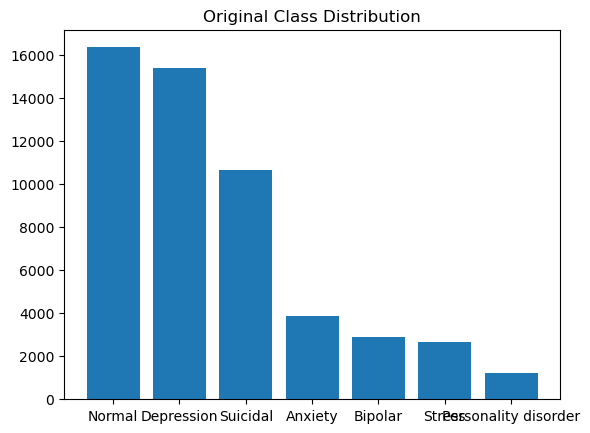

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\arpit\Desktop\archive\Combined Data.csv")

plt.title("Original Class Distribution")
plt.bar(data['status'].value_counts().index,
        data['status'].value_counts().values)
plt.show()


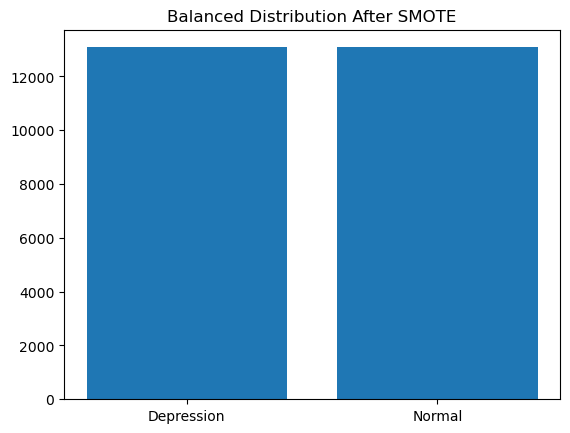

In [21]:
plt.title("Balanced Distribution After SMOTE")
plt.bar(['Depression', 'Normal'],
        [sum(y_res==1), sum(y_res==0)])
plt.show()


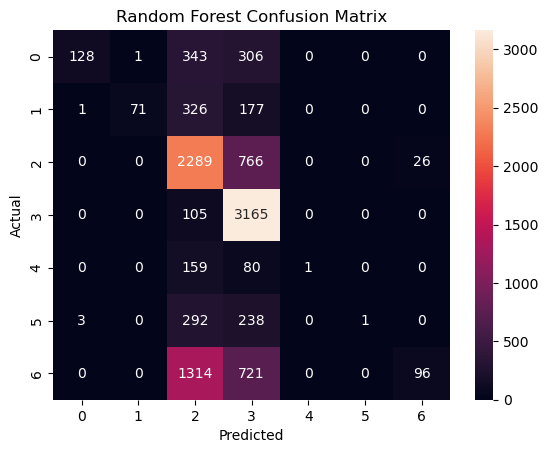

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


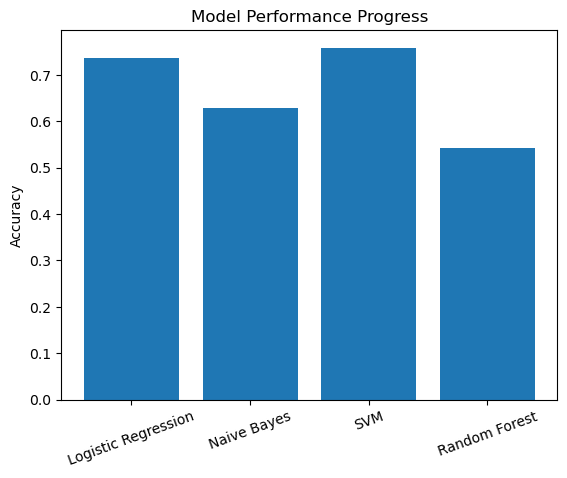

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']

accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]

plt.title("Model Performance Progress")
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()
